In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import joblib
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [2]:
sklearn.set_config(transform_output="pandas")

In [3]:
train_df=pd.read_csv("Dataset/train_data.csv")
test_df=pd.read_csv("Dataset/test_data.csv")


In [4]:
train_df.dtypes

location       object
total_sqft    float64
bath          float64
balcony       float64
BHK           float64
price         float64
dtype: object

In [118]:
test_df

,location,total_sqft,bath,balcony,BHK,price
0,other,824.0,2.0,0.0,2.0,60.00
1,hennur,1225.0,2.0,1.0,2.0,57.00
2,whitefield,11890.0,4.0,3.0,4.0,700.00
3,lakshminarayana pura,1695.0,3.0,2.0,3.0,150.00
4,begur road,1160.0,2.0,2.0,2.0,40.59
...,...,...,...,...,...,...
3348,hebbal,4772.0,6.0,2.0,4.0,510.00
3349,dasanapura,708.0,1.0,1.0,1.0,41.00
3350,hennur road,1685.0,3.0,2.0,3.0,95.00
3351,babusapalaya,1141.0,2.0,1.0,2.0,46.00


In [119]:
def split_data(data):
    X=data.drop(columns=['price'])
    y=data.price.copy()
    return (X,y)

In [120]:
X_train,y_train=split_data(train_df)

In [121]:
X_train

,location,total_sqft,bath,balcony,BHK
0,konanakunte,884.0,1.0,0.0,2.0
1,sarjapur road,2720.0,5.0,2.0,3.0
2,raja rajeshwari nagar,1303.0,2.0,2.0,2.0
3,hebbal,1420.0,2.0,2.0,2.0
4,basavangudi,2600.0,4.0,3.0,4.0
...,...,...,...,...,...
5024,other,1050.0,2.0,2.0,2.0
5025,hennur road,3450.0,4.0,3.0,4.0
5026,channasandra,1500.0,3.0,1.0,3.0
5027,kothanur,1760.0,3.0,2.0,3.0


In [122]:
y_train

0        58.00
1       210.00
2        44.17
3       107.00
4       260.00
         ...  
5024     65.00
5025    294.00
5026     61.95
5027    150.00
5028     27.00
Name: price, Length: 5029, dtype: float64

In [123]:
X_test,y_test=split_data(test_df)

In [124]:
X_test

,location,total_sqft,bath,balcony,BHK
0,other,824.0,2.0,0.0,2.0
1,hennur,1225.0,2.0,1.0,2.0
2,whitefield,11890.0,4.0,3.0,4.0
3,lakshminarayana pura,1695.0,3.0,2.0,3.0
4,begur road,1160.0,2.0,2.0,2.0
...,...,...,...,...,...
3348,hebbal,4772.0,6.0,2.0,4.0
3349,dasanapura,708.0,1.0,1.0,1.0
3350,hennur road,1685.0,3.0,2.0,3.0
3351,babusapalaya,1141.0,2.0,1.0,2.0


In [125]:
y_test

0        60.00
1        57.00
2       700.00
3       150.00
4        40.59
         ...  
3348    510.00
3349     41.00
3350     95.00
3351     46.00
3352    237.50
Name: price, Length: 3353, dtype: float64

In [126]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    5029 non-null   object 
 1   total_sqft  5029 non-null   float64
 2   bath        5029 non-null   float64
 3   balcony     5029 non-null   float64
 4   BHK         5029 non-null   float64
dtypes: float64(4), object(1)
memory usage: 196.6+ KB


In [127]:
num_cols=['total_sqft','bath','balcony','BHK']
cat_cols=['location']

In [128]:
num_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scalar',StandardScaler())
])

cat_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

In [129]:
preprocessor=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)
])

In [130]:
preprocessor.fit_transform(X_train)

,num__total_sqft,num__bath,num__balcony,num__BHK,cat__location_1st block jayanagar,cat__location_1st phase jp nagar,cat__location_2nd stage nagarbhavi,cat__location_5th block hbr layout,cat__location_5th phase jp nagar,cat__location_6th phase jp nagar,cat__location_7th phase jp nagar,cat__location_8th phase jp nagar,cat__location_9th phase jp nagar,cat__location_abbigere,cat__location_aecs layout,cat__location_akshaya nagar,cat__location_ambalipura,cat__location_ambedkar nagar,cat__location_amruthahalli,cat__location_anandapura,cat__location_ananth nagar,cat__location_anekal,cat__location_anjanapura,cat__location_ardendale,cat__location_arekere,cat__location_attibele,cat__location_babusapalaya,cat__location_balagere,cat__location_banashankari,cat__location_banashankari stage ii,cat__location_banashankari stage iii,cat__location_banashankari stage v,cat__location_banashankari stage vi,cat__location_banaswadi,cat__location_banjara layout,cat__location_bannerghatta,cat__location_bannerghatta road,cat__location_basavangudi,cat__location_basaveshwara nagar,cat__location_battarahalli,cat__location_begur,cat__location_begur road,cat__location_bellandur,cat__location_benson town,cat__location_bharathi nagar,cat__location_bhoganhalli,cat__location_billekahalli,cat__location_binny pete,cat__location_bisuvanahalli,cat__location_bommanahalli,cat__location_bommasandra,cat__location_bommasandra industrial area,cat__location_bommenahalli,cat__location_brookefield,cat__location_btm 2nd stage,cat__location_btm layout,cat__location_budigere,cat__location_chamrajpet,cat__location_chandapura,cat__location_channasandra,cat__location_chikka tirupathi,cat__location_chikkabanavar,cat__location_chikkalasandra,cat__location_choodasandra,cat__location_cooke town,cat__location_cox town,cat__location_cv raman nagar,cat__location_dasanapura,cat__location_dasarahalli,cat__location_devanahalli,cat__location_devarachikkanahalli,cat__location_dodda nekkundi,cat__location_doddaballapur,cat__location_doddakallasandra,cat__location_doddathoguru,cat__location_domlur,cat__location_dommasandra,cat__location_electronic city,cat__location_electronic city phase ii,cat__location_electronics city phase 1,cat__location_epip zone,cat__location_frazer town,cat__location_garudachar palya,cat__location_giri nagar,cat__location_gm palaya,cat__location_gollarapalya hosahalli,cat__location_gottigere,cat__location_green glen layout,cat__location_gubbalala,cat__location_gunjur,cat__location_hal 2nd stage,cat__location_haralur road,cat__location_harlur,cat__location_hbr layout,cat__location_hebbal,cat__location_hebbal kempapura,cat__location_hegde nagar,cat__location_hennur,cat__location_hennur road,cat__location_hoodi,cat__location_horamavu agara,cat__location_horamavu banaswadi,cat__location_hormavu,cat__location_hosa road,cat__location_hosakerehalli,cat__location_hoskote,cat__location_hosur road,cat__location_hrbr layout,cat__location_hsr layout,cat__location_hulimavu,cat__location_iblur village,cat__location_indira nagar,cat__location_isro layout,cat__location_itpl,cat__location_jakkur,cat__location_jalahalli,cat__location_jalahalli east,cat__location_jigani,cat__location_jp nagar,cat__location_judicial layout,cat__location_kadubeesanahalli,cat__location_kadugodi,cat__location_kaggadasapura,cat__location_kaggalipura,cat__location_kaikondrahalli,cat__location_kalena agrahara,cat__location_kalyan nagar,cat__location_kambipura,cat__location_kammanahalli,cat__location_kammasandra,cat__location_kanakapura,cat__location_kanakpura road,cat__location_kannamangala,cat__location_karuna nagar,cat__location_kasavanhalli,cat__location_kasturi nagar,cat__location_kathriguppe,cat__location_kaval byrasandra,cat__location_kenchenahalli,cat__location_kengeri,cat__location_kengeri satellite town,cat__location_kereguddadahalli,cat__location_kodichikkanahalli,cat__location_kodigehaali,cat__location_kodigehalli,cat__location_kodihalli,cat__location_kogilu,cat__location_konanakunte,cat__location_kora

In [131]:
algorithms={
    "Linear Regression":LinearRegression(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGB Regressor":XGBRegressor(objective='reg:squarederror'),
    "Gradient Boosting Regressor":GradientBoostingRegressor()
}

In [132]:
def plot_curve(sizes,mean_scores,std_scores,label,ax):
    ax.plot(
        sizes,
        mean_scores,
        marker='o',
        label=label
    )
    ax.fill_between(
        x=sizes,
        y1=mean_scores-std_scores,
        y2=mean_scores+std_scores,
        alpha=0.5
    )

In [133]:
def plot_learning_curve(name,algorithm,figsize=(12,4)):
    model=Pipeline(steps=[
        ("pre",preprocessor),
        ('alg',algorithm)
    ])
    train_sizes,train_scores,test_scores=learning_curve(
        estimator=model,
        X=X_test,
        y=y_test,
        cv=3,
        scoring="r2",
        n_jobs=-1,
        random_state=42
    )
    mean_train_scores=np.mean(train_scores,axis=1)
    std_train_scores=np.std(train_scores,axis=1)
    train_score=f"{mean_train_scores[-1]:0.2f} +/- {std_train_scores[-1]:0.2f}"
    mean_test_scores=np.mean(test_scores,axis=1)
    std_test_scores=np.std(test_scores,axis=1)
    test_score=f"{mean_test_scores[-1]:0.2f} +/- {std_test_scores[-1]:0.2f}"

    fig,ax=plt.subplots(figsize=figsize)
    #training curve

    plot_curve(
        train_sizes,
        mean_train_scores,
        std_train_scores,
        f"Train({train_score})",
        ax
    )
     #test curve

    plot_curve(
        train_sizes,
        mean_test_scores,
        std_test_scores,
        f"Test({test_score})",
        ax
    )
    ax.set(xlabel="Training set Size",ylabel="R_squared",title=name)
    ax.legend(loc="lower right")
    plt.show()

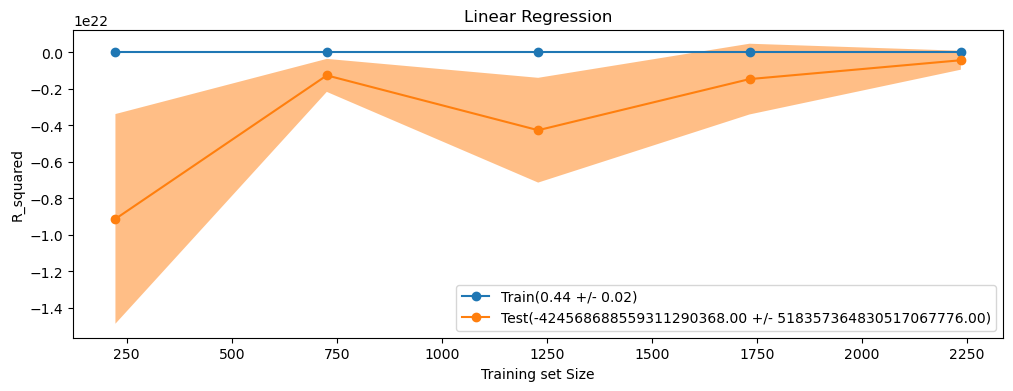

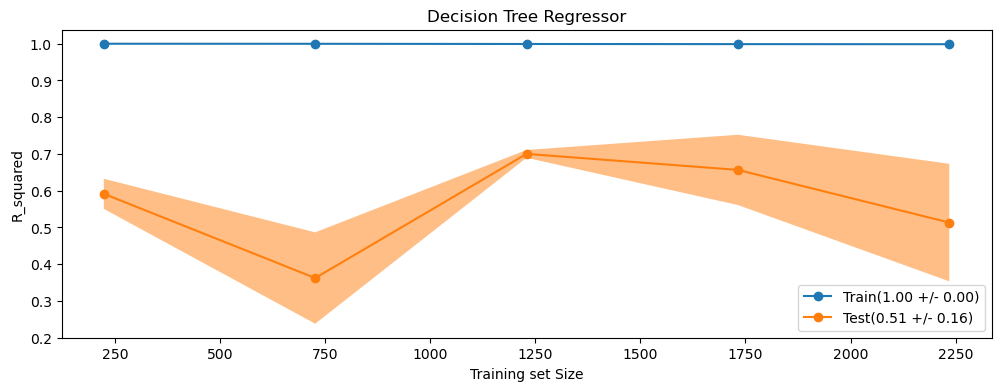

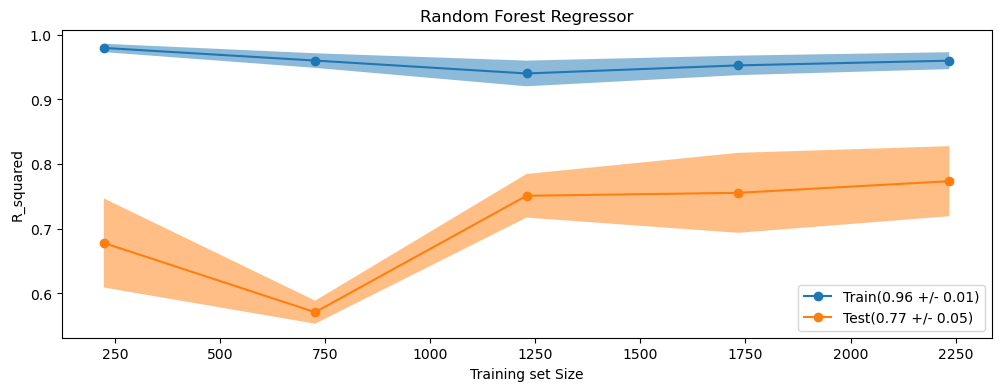

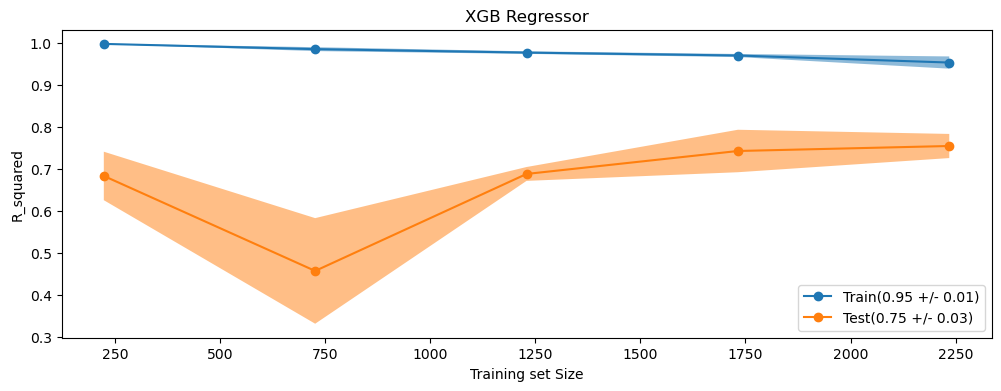

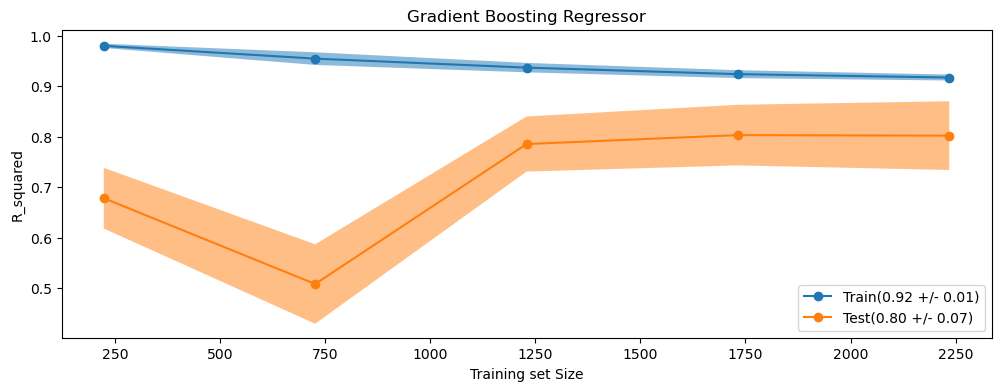

In [134]:
for name,alg in algorithms.items():
    plot_learning_curve(name,alg,)

In [150]:
model=Pipeline(steps=[
    ('pre',preprocessor),
    ('xgb', RandomForestRegressor())
])

In [151]:
model.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['total_sqft', 'bath',
                                                   'balcony', 'BHK']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['location'])])),
                ('xgb', RandomForestRegressor())])

In [152]:
def eval(X,y):
    y_pred=model.predict(X)
    return r2_score(y,y_pred)

In [153]:
print(eval(X_test,y_test))

0.7665087859379816


In [154]:
print(eval(X_train,y_train))

0.9743959016655198


In [155]:
joblib.dump(model,"model.joblib")

['model.joblib']